# Final Project - Harbour Tunnel, Cahill Expressway, Western Distributor - Linear Regression


jupyter nbconvert OliviaRFinalProjectSlides.ipynb --to slides --post serve

## Functions to Support Importing and Analysing Data

In [2]:
import glob
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=110) 
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [15,7]

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:


def startweatherdat():
    path = '/home/oliviaross/git/Final-Project-OliviaR/Data/Weather/hourly'
    allfiles = glob.glob(path + '/*.csv')
    listoffiles = []
    
    for eachFile in allfiles:
        df = pd.read_csv(eachFile, index_col=None)
        df = df[df['parameter'].isin(['AIR_TEMP_MAX'])]
        df = df[df['area_code'].isin(['NSW_PT005'])]
        listoffiles.append(df)
    newdataframe = pd.concat(listoffiles, sort=False)
    
    info(newdataframe)
      
    newdataframe['date']=(pd.to_datetime(newdataframe['valid_start'],unit='s'))
    newdataframe['date']= newdataframe['date']+pd.DateOffset(hours=10)
    newdataframe['year'] = newdataframe['date'].dt.year
    newdataframe['month'] = newdataframe['date'].dt.month
    newdataframe['day'] = newdataframe['date'].dt.day
    newdataframe['hour'] = newdataframe['date'].dt.hour
    newdataframe['dayweek'] = newdataframe['date'].dt.dayofweek
    newdataframe['timestamp'] = newdataframe['year'].astype(str) + newdataframe['month'].astype(str).str.zfill(2) + newdataframe['day'].astype(str).str.zfill(2) + newdataframe['hour'].astype(str).str.zfill(2)
    newdataframe['timestamp'] = newdataframe['timestamp'].astype(int)
    
    newdataframe=newdataframe.reset_index(drop=True)
    
    newdataframe=newdataframe.drop(columns=['station_number','parameter','valid_start','valid_end','unit', 'statistic','instantaneous','level','qc_valid_minutes','qc_valid_minutes_start','qc_valid_minutes_end'])
    
    info(newdataframe)
    
    return newdataframe

def startraindat():
    path = '/home/oliviaross/git/Final-Project-OliviaR/Data/Weather/hourly'
    allfiles = glob.glob(path + '/*.csv')
    listoffiles = []
    
    for eachFile in allfiles:
        df = pd.read_csv(eachFile, index_col=None)
        df = df[df['area_code'].isin(['NSW_PT005'])]
        df = df[df['parameter'].isin(['PRCP'])]
        listoffiles.append(df)
    newdataframe = pd.concat(listoffiles, sort=False)
    
    info(newdataframe)
    
    #newdataframe = newdataframe[newdataframe['area_code'].isin(['NSW_PT013'])]
    #newdataframe = newdataframe[newdataframe['parameter'].isin(['PRCP'])]
    newdataframe['date']=(pd.to_datetime(newdataframe['valid_start'],unit='s')) 
    newdataframe['date']= newdataframe['date']+pd.DateOffset(hours=10)
    newdataframe['year'] = newdataframe['date'].dt.year
    newdataframe['month'] = newdataframe['date'].dt.month
    newdataframe['day'] = newdataframe['date'].dt.day
    newdataframe['hour'] = newdataframe['date'].dt.hour
    newdataframe['dayweek'] = newdataframe['date'].dt.dayofweek
    newdataframe['timestamp'] = newdataframe['year'].astype(str) + newdataframe['month'].astype(str).str.zfill(2) + newdataframe['day'].astype(str).str.zfill(2) + newdataframe['hour'].astype(str).str.zfill(2)
    newdataframe['timestamp'] = newdataframe['timestamp'].astype(int)
   
    newdataframe=newdataframe.reset_index(drop=True)
    
    newdataframe=newdataframe.drop(columns=['station_number','parameter','valid_start','valid_end','unit', 'statistic','instantaneous','level','qc_valid_minutes','qc_valid_minutes_start','qc_valid_minutes_end'])
    
    
    info(newdataframe)
    
    return newdataframe
  
def starttrafficdat(direction=0):
    path = '/home/oliviaross/git/Final-Project-OliviaR/Data/Traffic/actualdata'
    
       
    allfiles = glob.glob(path + '/*.csv')
    listoffiles = []
    
    for eachFile in allfiles:
        print(eachFile.title)
        df = pd.read_csv(eachFile, index_col=None, skip_blank_lines=True)
        listoffiles.append(df)
    
    for i in listoffiles:
        print(i.columns)
    
    newdataframe = pd.concat(listoffiles)
    
    newdataframe=newdataframe.rename(str.lower, axis='columns')
    info(newdataframe)
    newdataframe = newdataframe[newdataframe['year'].isin([2015,2016,2017,2018])]
    if direction!=0:
        newdataframe = newdataframe[newdataframe['direction'].isin([direction])]

    newdataframe.reset_index(drop=True)
    
    info(newdataframe)

    newdataframe['date'] = pd.to_datetime(newdataframe['date'])

    newdataframe = pd.melt(newdataframe, id_vars=['year','date','direction','vehicle type','public','school','loc'], var_name='hour')
    
    newdataframe['month'] = newdataframe['date'].dt.month
    newdataframe['day'] = newdataframe['date'].dt.day
    newdataframe['dayweek'] = newdataframe['date'].dt.dayofweek
    newdataframe['hour'] = newdataframe['hour'].astype('int64')
    
    newdataframe['date'] = newdataframe['date']+ pd.to_timedelta(newdataframe.hour, unit='h')
    newdataframe['timestamp'] = newdataframe['year'].astype(str) + newdataframe['month'].astype(str).str.zfill(2) + newdataframe['day'].astype(str).str.zfill(2) + newdataframe['hour'].astype(str).str.zfill(2)
    newdataframe['timestamp'] = newdataframe['timestamp'].astype(int)
    
    #newdataframe['valueunScale'] = newdataframe['value']
    #newdataframe['value'] = newdataframe['valueunScale']/100
    info(newdataframe)
    
    return newdataframe
    

def outputfiles(newdataframe, filename):
    output = pd.DataFrame(newdataframe)
    filename = filename + '.csv'
    output.to_csv('/home/oliviaross/git/Final-Project-OliviaR/Data/' + filename, index = True, header=True)
    
    
def info(dataframe):
    print('\n Information')
    dataframe.info()
    print('\n Top 5 Results')
    print(dataframe.head())
    print('\n Columns available')
    print(dataframe.columns)
    
    
def importfile(file):
    filename = file + '.csv'
    newdataframe = pd.read_csv('/home/oliviaross/git/Final-Project-OliviaR/Data/' + filename, index_col=0)
    if 'date' in newdataframe.columns:
        newdataframe['date'] = pd.to_datetime(newdataframe['date'])
    if 'timestamp' in newdataframe.columns:
        newdataframe['timestamp'] = newdataframe['timestamp'].astype(int)
    newdataframe.reset_index(drop=True)
    return newdataframe
        

## Initial Data Creation

### Only do this if you must! It can crash the computer. Use the import function to import the already created CSVs as a shortcut.

In [4]:
#weather = startweatherdat()

In [5]:
#rain = startraindat()

In [6]:
trafficS = starttrafficdat('Southbound')
trafficN = starttrafficdat('Northbound')
traffic = starttrafficdat()

<built-in method title of str object at 0x7fe10e8686b8>
<built-in method title of str object at 0x7fe10e868750>
<built-in method title of str object at 0x7fe10e8687e8>
Index(['YEAR', 'DATE', 'DIRECTION', 'VEHICLE TYPE', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'public', 'school', 'loc'], dtype='object')
Index(['YEAR', 'DATE', 'DIRECTION', 'VEHICLE TYPE', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'public', 'school', 'loc'], dtype='object')
Index(['YEAR', 'DATE', 'DIRECTION', 'VEHICLE TYPE', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'public', 'school', 'loc'], dtype='object')

 Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19865 entries, 0 to 6036
Data columns (total 31 columns):
year            1986


 Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 5315 to 6036
Data columns (total 31 columns):
year            1997 non-null int64
date            1997 non-null object
direction       1997 non-null object
vehicle type    1997 non-null object
0               1972 non-null float64
1               1996 non-null float64
2               1992 non-null float64
3               1997 non-null float64
4               1997 non-null float64
5               1997 non-null float64
6               1997 non-null float64
7               1997 non-null int64
8               1993 non-null float64
9               1997 non-null float64
10              1997 non-null float64
11              1997 non-null float64
12              1997 non-null float64
13              1997 non-null float64
14              1997 non-null float64
15              1997 non-null float64
16              1997 non-null int64
17              1997 non-null int64
18              1997 non-null int64
19             


 Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100176 entries, 0 to 100175
Data columns (total 13 columns):
year            100176 non-null int64
date            100176 non-null datetime64[ns]
direction       100176 non-null object
vehicle type    100176 non-null object
public          100176 non-null int64
school          100176 non-null int64
loc             100176 non-null int64
hour            100176 non-null int64
value           100093 non-null float64
month           100176 non-null int64
day             100176 non-null int64
dayweek         100176 non-null int64
timestamp       100176 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(9), object(2)
memory usage: 9.9+ MB

 Top 5 Results
   year       date   direction  vehicle type  public  school   loc  hour  value  month  day  dayweek   timestamp
0  2015 2015-01-02  Southbound  All Vehicles       0       1  1003     0  200.0      1    2        4  2015010200
1  2015 2015-01-03  Southbound  All Vehicles 

## Optional Output Files

In [7]:
#outputfiles(weather, 'weather')
#outputfiles(rain, 'rain')
outputfiles(trafficS, 'trafficS')
outputfiles(trafficN, 'trafficN')
outputfiles(traffic, 'traffic')

## Optional Input Files

In [8]:
weather = importfile('weather')
#info(weather)

In [9]:
rain = importfile('rain')
#info(rain)

In [10]:
trafficS = importfile('trafficS')
#info(trafficS)

In [11]:
trafficN = importfile('trafficN')
#info(trafficN)

In [12]:
traffic = importfile('traffic')
#info(traffic)


In [13]:
pd.pivot_table(traffic, aggfunc='count', index=['year','direction','loc'], columns = ['month'], values = 'value')

month                    1      2      3      4      5      6      7      8      9      10     11     12
year direction  loc                                                                                     
2015 Northbound 1003  696.0  672.0  696.0  576.0  456.0    NaN    NaN  264.0  720.0  719.0  720.0  600.0
                1004    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  431.0  576.0
                1011  671.0  670.0  695.0  575.0  575.0    NaN    NaN  264.0  694.0  718.0  718.0  551.0
     Southbound 1003  720.0  672.0  696.0  600.0  408.0    NaN    NaN  264.0  720.0  743.0  720.0  696.0
                1004    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  431.0  528.0
                1011  623.0  670.0  695.0  575.0  575.0    NaN    NaN  264.0  694.0  718.0  718.0  455.0
2016 Northbound 1003  696.0  696.0  624.0  600.0  743.0  672.0   72.0    NaN  528.0  670.0  718.0  624.0
                1004  696.0  696.0  624.0  600.0  744.0  672.0  744.0  744.0  576.0    NaN    NaN    NaN
                1011  671.0  695.0  623.0  600.0  743.0  408.0   72.0    NaN  192.0  503.0  718.0  648.0
     Southbound 1003  696.0  696.0  624.0  624.0  743.0  720.0   72.0    NaN  528.0  742.0  718.0  744.0
                1004  648.0  696.0  600.0  600.0  744.0  696.0  743.0  744.0  576.0    NaN    NaN    NaN
                1011  623.0  695.0  623.0  576.0  719.0  670.0   72.0    NaN  216.0  503.0  718.0  432.0
2017 Northbound 1003  696.0  672.0  744.0  600.0  744.0  696.0  743.0  744.0  720.0  719.0  718.0  600.0
                1004    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  599.0  719.0  716.0  576.0
     Southbound 1003  720.0  672.0  744.0  648.0  744.0  720.0  743.0  744.0  720.0  743.0  695.0  720.0
                1004    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  623.0  719.0  286.0    NaN
                1011  576.0  672.0  743.0  600.0  744.0  695.0  744.0  743.0  696.0  695.0  719.0  504.0
2018 Northbound 1003  720.0  261.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
                1004  672.0  672.0  696.0  624.0  719.0  648.0    NaN    NaN    NaN    NaN    NaN    NaN
     Southbound 1003  744.0  240.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
                1011  600.0  264.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN



### Because the cars can deviate to three points after crossing the bridge: the Western Distributor, the Cahill Expressway, and York St, it is important to capture all three data points. 

### We already do not have the data for York St because there is no recording station at this exit point. However, this is not fatal to our analysis as cars are not permitted to exit onto York St during peak hours.

Find the timestamps that are in common for all three roads, and remove all location values where there are not three values.  

In [14]:
trafficN = trafficN.groupby('timestamp').filter(lambda x: len(x) == 3).sort_values('timestamp')
#trafficN['timestamp'].value_counts()

In [15]:
#info(trafficN)

In [16]:
trafficS =  trafficS.groupby('timestamp').filter(lambda x: len(x) == 3).sort_values('timestamp')
#trafficS['timestamp'].value_counts()

In [17]:
#info(trafficS)

In [18]:
trafficA = pd.concat([trafficN, trafficS])

We do not want each reporting station to be separate. So use aggregate function to add the stations together.

In [19]:
trafficSg = trafficS.groupby(['year', 'date', 'direction', 'public', 'school', 'hour', 'month', 'day', 'dayweek', 'timestamp'], as_index=False).agg({'value':'sum'})
trafficNg = trafficN.groupby(['year', 'date', 'direction', 'public', 'school', 'hour', 'month', 'day', 'dayweek', 'timestamp'], as_index=False).agg({'value':'sum'})
trafficAg = trafficA.groupby(['year', 'date', 'direction','public', 'school', 'hour', 'month', 'day', 'dayweek', 'timestamp'], as_index=False).agg({'value':'sum'})

trafficSg['timestamp'] = trafficSg['timestamp'].astype(int)
trafficNg['timestamp'] = trafficNg['timestamp'].astype(int)
trafficAg['timestamp'] = trafficAg['timestamp'].astype(int)

In [20]:
#info(trafficAg)

In [21]:

pd.pivot_table(trafficAg, values='value', index=['month'], columns='direction', aggfunc='count')

direction,Northbound,Southbound
month,,
1,672.0,624.0
2,696.0,696.0
3,624.0,600.0
4,600.0,576.0
5,744.0,720.0
6,360.0,672.0
7,72.0,72.0
9,192.0,816.0
10,NaN,696.0


Southbound has significantly more data per month. So it will be used as a priority in calculations

In [22]:
#pd.pivot_table(trafficAg, values='value', index=['year','month','day'], columns='hour', aggfunc='count')


In [23]:
outputfiles(trafficAg, 'trafficAg')
outputfiles(trafficNg, 'trafficNg')
outputfiles(trafficSg, 'trafficSg')

# Statistics

In [24]:


def corr_plot(df, title_name):
    _ , ax = plt.subplots(figsize=(10, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    corr = df.corr()
    # Generate a mask for the lower triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    _ = sns.heatmap(
        corr, mask=mask, cmap=cmap,
        square=True, 
        cbar_kws={'shrink':.7},
        
        ax=ax,
        annot=True, 
        linewidths=0.5,
        vmax=1.0, vmin=-1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title(title_name, y=1.05, size=15)
    
def workday (row):
    if row['public']==1:
        return 0
    if row['dayweek']==5:
        return 0
    if row['dayweek']==6:
        return 0
    else:
        return 1
    
def makeworkday (dataframe):
    dataframe['workday'] = dataframe.apply(lambda row: workday (row),axis=1)
    return dataframe

def rainseverity(dataframe):
    dataframe['rainSev'] = dataframe.apply(lambda row: rainsevrow (row),axis=1)
    return dataframe    

def rainsevrow(row):
    if row['value'] == 0:
        return 0
    if row['value']<=0.2:
        return 1
    if row['value']<=1:
        return 2
    if row['value']<=5:
        return 3
    else:
        return 4
    
def weatherseverity(dataframe):
    dataframe['weathSev'] = dataframe.apply(lambda row: weathersevrow (row),axis=1)
    return dataframe    

def weathersevrow(row):
    if row['value'] <10:
        return 0
    if row['value']<=15:
        return 1
    if row['value']<=20:
        return 2
    if row['value']<=25:
        return 3
    if row['value']<=30:
        return 4
    if row['value']<=35:
        return 5
    else:
        return 6
    

### Create a workday value

In [25]:
makeworkday(trafficS);

makeworkday(trafficN);

makeworkday(trafficA);

makeworkday(trafficSg);

makeworkday(trafficNg);

makeworkday(trafficAg);

# TimeSeries

Is this data a timeseries?

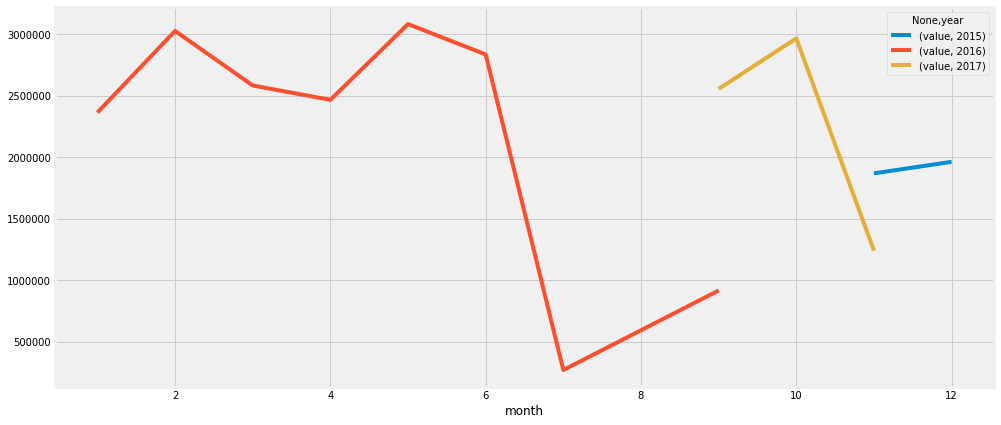

In [26]:
bymonth = trafficSg.groupby(['year','month'], as_index=False).agg({'value':'sum'})
byMonthYear = pd.pivot_table(bymonth, values=['value'], index=['month'], columns='year', aggfunc='mean')
byMonthYear.plot(figsize=(15,7));

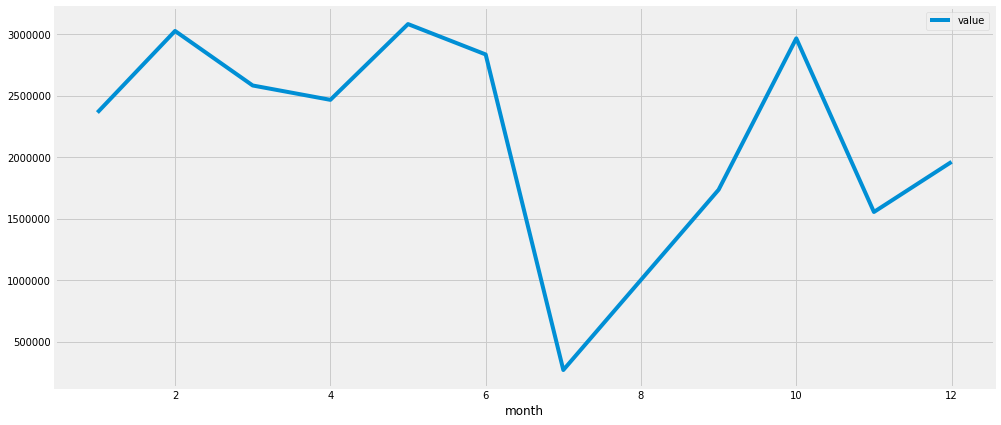

In [27]:
byMonth = pd.pivot_table(bymonth, values=['value'], index=['month'], aggfunc='mean')

byMonth.plot(figsize=(15,7));

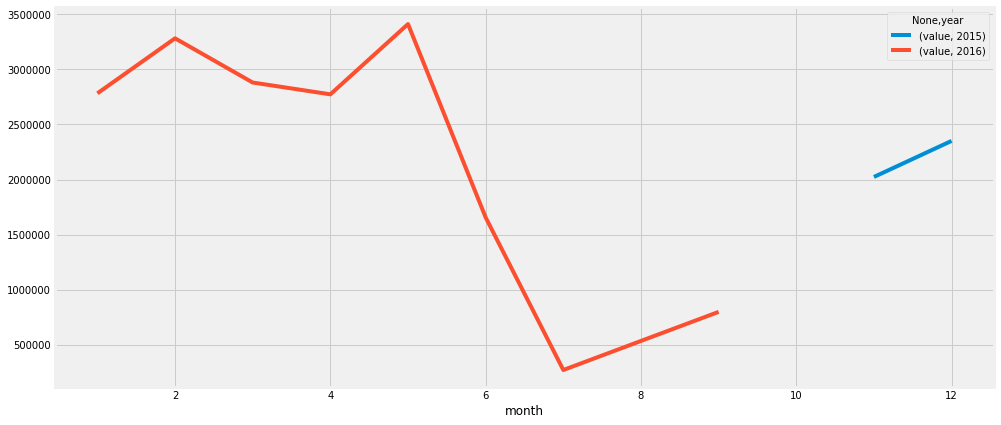

In [28]:
bymonth = trafficNg.groupby(['year','month'], as_index=False).agg({'value':'sum'})
byMonthYear = pd.pivot_table(bymonth, values=['value'], index=['month'], columns='year', aggfunc='mean')
byMonthYear.plot(figsize=(15,7));

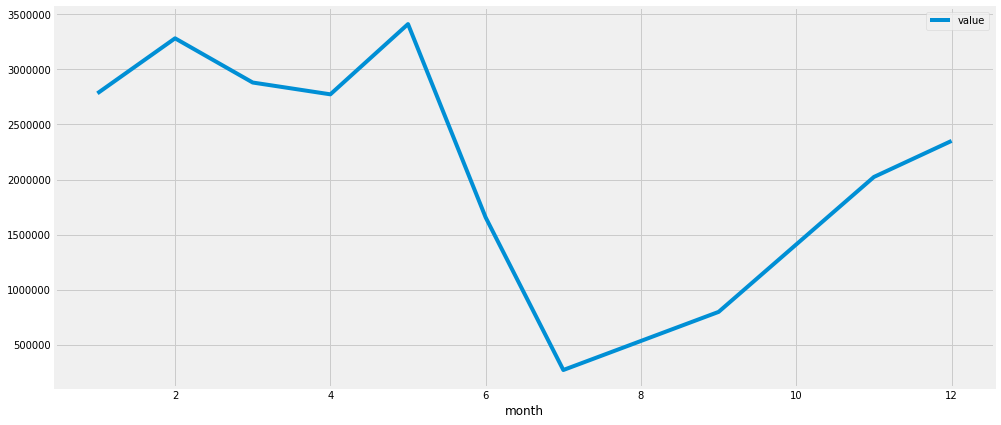

In [29]:
byMonth = pd.pivot_table(bymonth, values=['value'], index=['month'], aggfunc='mean')

byMonth.plot(figsize=(15,7));

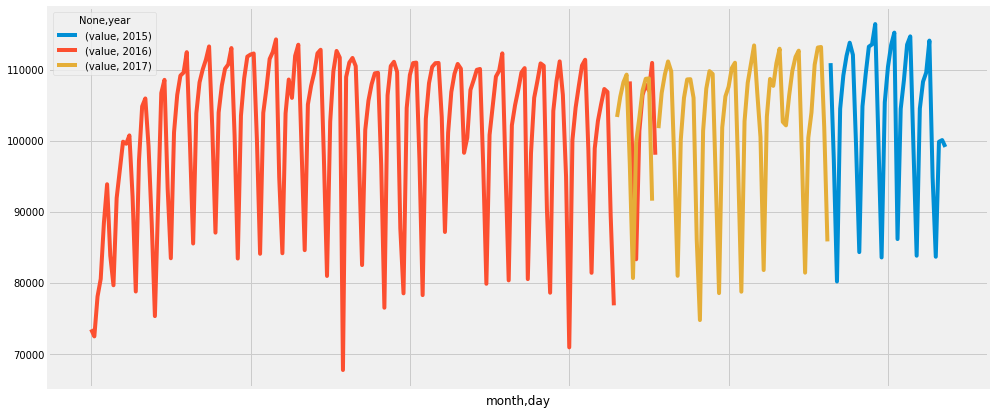

In [30]:
byday  = trafficSg.groupby(['year','month','day'], as_index=False).agg({'value':'sum'})
byDayMonthYear = pd.pivot_table(byday, values=['value'], index=['month','day'], columns='year', aggfunc='mean')
byDayMonthYear.plot(figsize=(15,7));

In [31]:
timeseries = trafficSg
#timeseries = timeseries.set_index('date')
#timeseries.head()

In [32]:
timeseries['dateonly'] = timeseries['date'].dt.strftime('%Y/%m/%d')

In [33]:
timeseries = timeseries.groupby(['dateonly','year', 'direction', 'public', 'school', 'month', 'day', 'dayweek', 'workday'], as_index=False).agg({'value':'sum'})
#timeseries.head()                                 

In [34]:
#type(timeseries)
#info(timeseries)
timeseries = timeseries.set_index('dateonly')

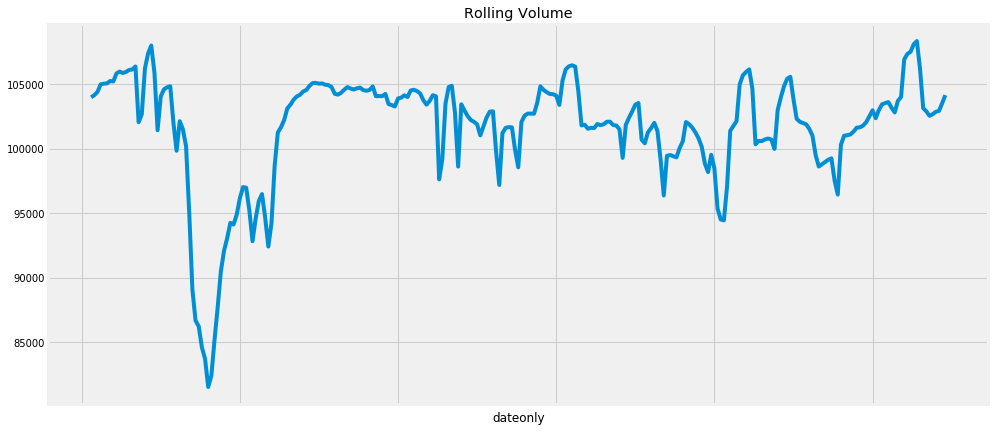

In [35]:
plt.subplots(figsize=(15,7));
timeseries['value'].rolling(window=7, center=True).mean().plot(title='Rolling Volume');

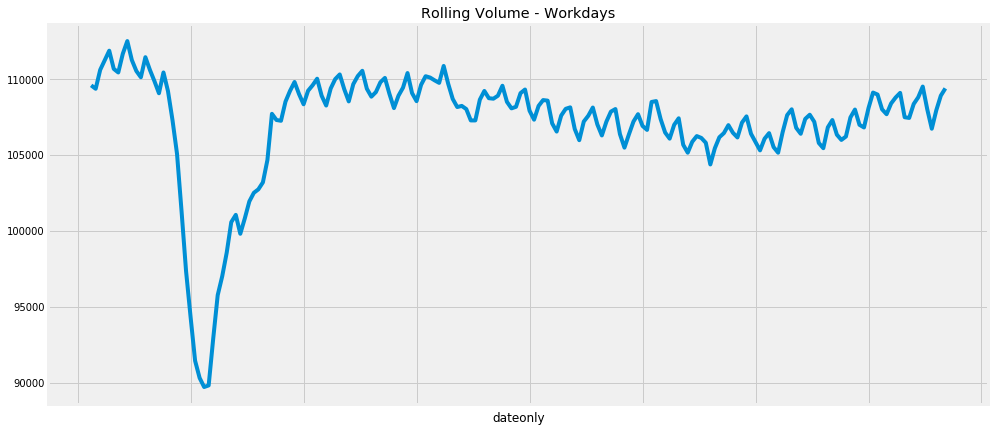

In [36]:
plt.subplots(figsize=(15,7));
timeseriesW = timeseries[timeseries['workday']==1]

timeseriesW['value'].rolling(window=7, center=True).mean().plot(title= 'Rolling Volume - Workdays');

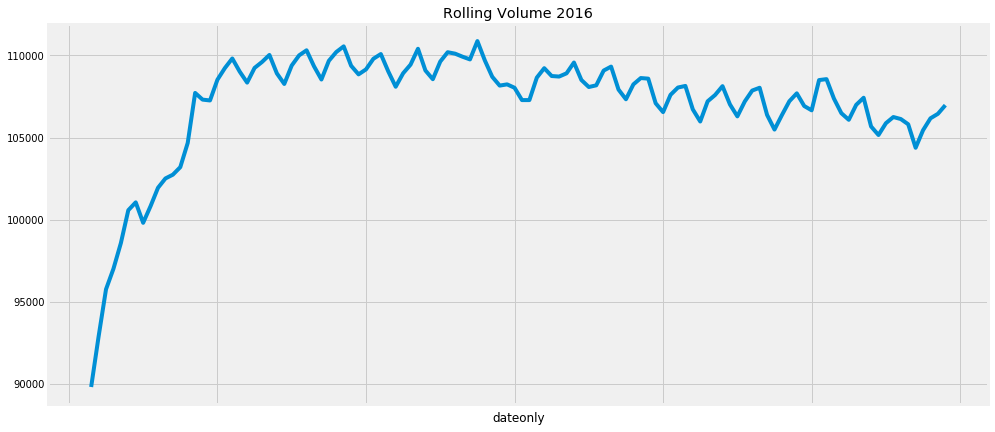

In [37]:
plt.subplots(figsize=(15,7));
timeseriesW = timeseries[timeseries['workday']==1]
timeseriesW = timeseriesW[timeseriesW['year']==2016]
timeseriesW['value'].rolling(window=7, center=True).mean().plot(title= 'Rolling Volume 2016');

This is a timeseries of data, but apart from a dip in January 2016, the rest of the data follows a pattern. Maybe the drop was caused by weather, maybe it is seasonal. It is difficult to tell from the available data because no other examples of January data exists for all three traffic monitoring stations.

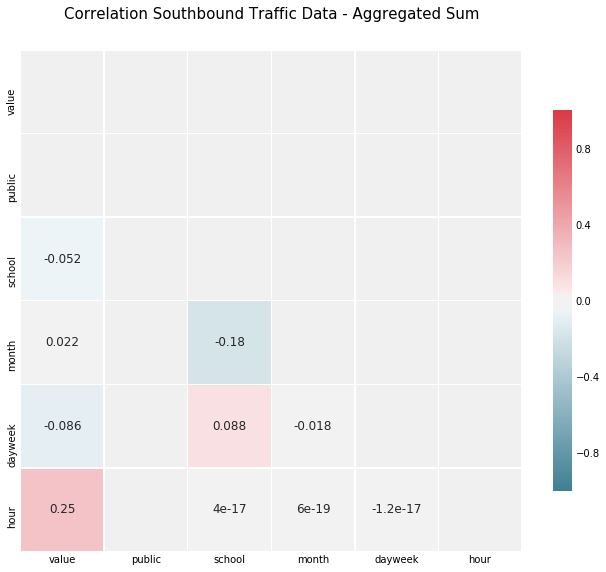

In [38]:
features = ['value','public', 'school','month', 'dayweek', 'hour']
corr_plot(trafficSg[features], title_name='Correlation Southbound Traffic Data - Aggregated Sum')

## Looking only at workdays

Looking only at workdays, the correlation only holds strongly for the hour of the day. There is not much more traffic on any particular day of the week. 

We can also drop 'public' because there was no public holiday over the entire dataset where all three monitoring stations were recording. Not for even an hour.


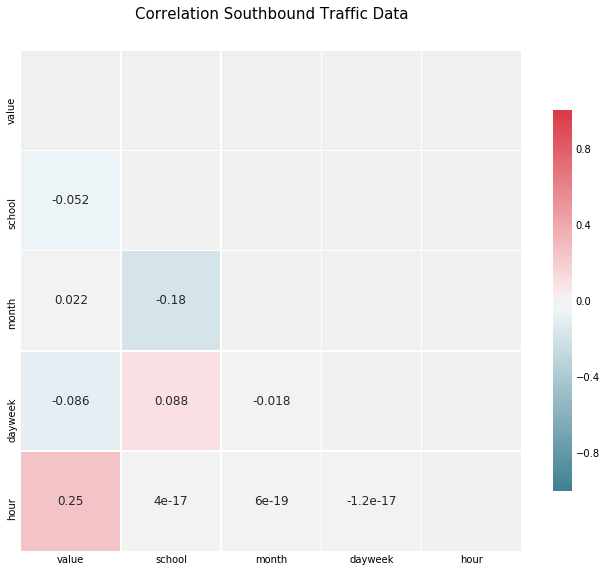

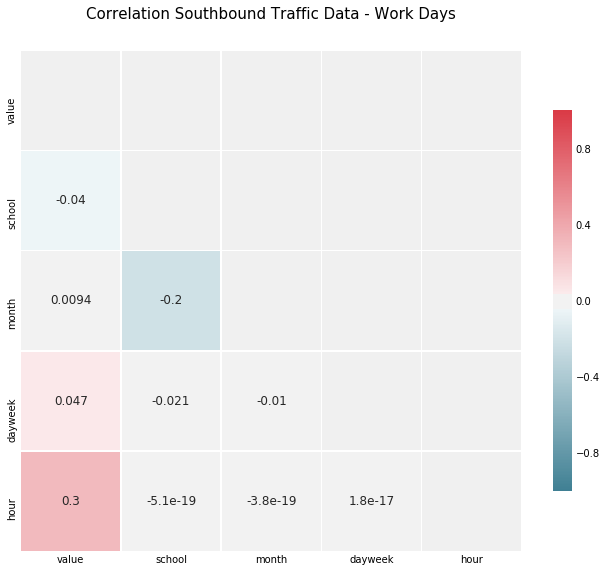

In [39]:
features = ['value', 'school','month', 'dayweek', 'hour']
corr_plot(trafficSg[features], title_name='Correlation Southbound Traffic Data')

features = ['value', 'school','month', 'dayweek', 'hour']
workdayTrafficSg = trafficAg[trafficAg['workday']==1]
corr_plot(workdayTrafficSg[features], title_name='Correlation Southbound Traffic Data - Work Days')

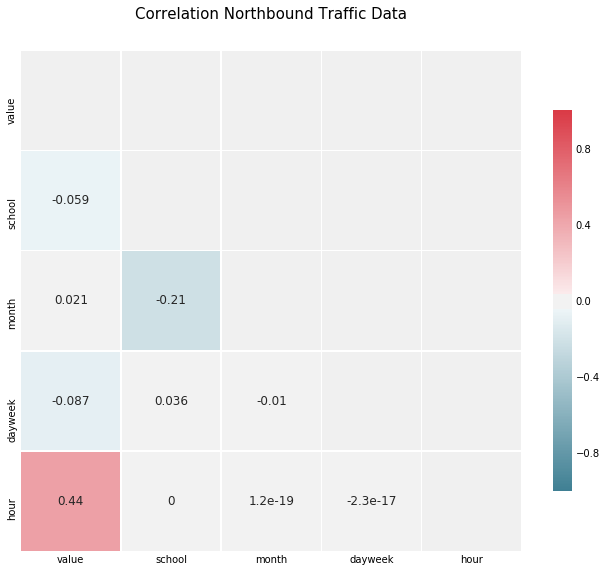

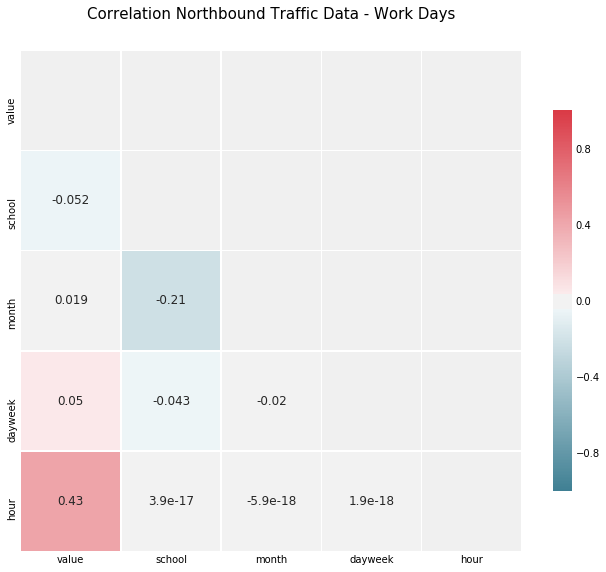

In [40]:
features = ['value', 'school','month', 'dayweek', 'hour']
corr_plot(trafficNg[features], title_name='Correlation Northbound Traffic Data')

features = ['value', 'school','month', 'dayweek', 'hour']
workdayTrafficNg = trafficNg[trafficNg['workday']==1]
corr_plot(workdayTrafficNg[features], title_name='Correlation Northbound Traffic Data - Work Days')

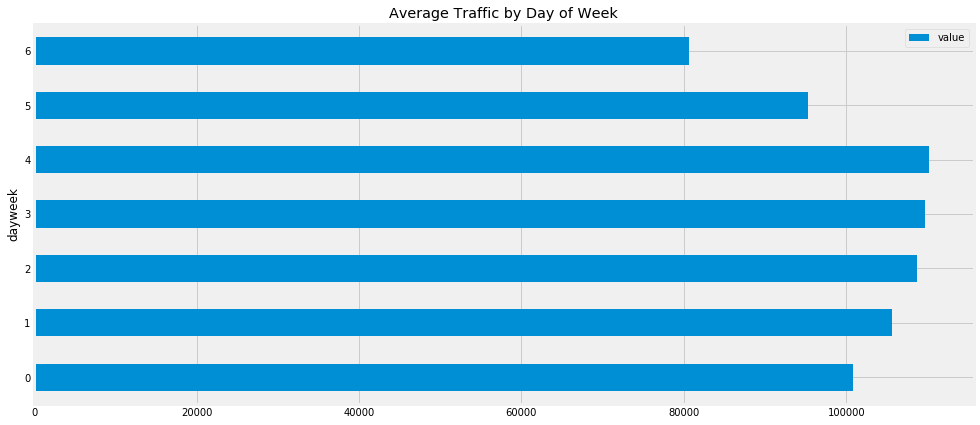

In [41]:

bydayweek = trafficSg.groupby(['year','month','day','dayweek'], as_index=False).agg({'value':'sum'})
byDayWeek = pd.pivot_table(bydayweek, values=['value'], index=['dayweek'],  aggfunc='mean')
byDayWeek.plot(kind='barh', figsize=(15,7), title='Average Traffic by Day of Week');

In [42]:
byhourS = trafficSg.groupby(['year','month','day','hour'], as_index=False).agg({'value':'sum'})
byHourS = pd.pivot_table(byhourS, values=['value'], index=['hour'],  aggfunc='mean')
#byHourS.plot(kind='barh')

In [43]:
byhourN = trafficNg.groupby(['year','month','day','hour'], as_index=False).agg({'value':'sum'})
byHourN = pd.pivot_table(byhourN, values=['value'], index=['hour'],  aggfunc='mean')
#byHourN.plot(kind='bar')

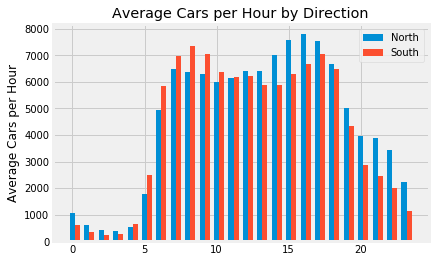

In [44]:
N = 24

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, byHourN['value'], width, label='North')
plt.bar(ind + width, byHourS['value'], width,
    label='South')

plt.ylabel('Average Cars per Hour')
plt.title('Average Cars per Hour by Direction')


plt.legend(loc='best')
plt.show()

## Weather Data

In [45]:
pd.pivot_table(weather, aggfunc='count', index=['year'], columns='month', values='value')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,741.0,617.0,705.0,733.0,717.0,744.0,627.0,744.0
2016,740.0,696.0,744.0,720.0,744.0,720.0,741.0,744.0,720.0,744.0,712.0,206.0
2017,744.0,672.0,441.0,720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
pd.pivot_table(rain, aggfunc='count', index=['year'], columns='month', values='value')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,744.0,720.0,744.0,744.0,719.0,744.0,627.0,744.0
2016,740.0,696.0,744.0,720.0,744.0,720.0,744.0,744.0,720.0,744.0,712.0,206.0
2017,744.0,672.0,744.0,720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have weather data for April 2015 to April 2-18.
But much less usable traffic data. We will merge the two to ensure the overlap at the right points

In [47]:
#info(weather)

In [48]:
mergetraffic = trafficAg[['timestamp', 'school', 'public']].drop_duplicates()

weatherM = pd.merge(weather, mergetraffic, left_on = 'timestamp', right_on = 'timestamp', how = 'inner')
rainM = pd.merge(rain, mergetraffic, left_on = 'timestamp', right_on = 'timestamp', how = 'inner')

In [49]:
#info(weather)

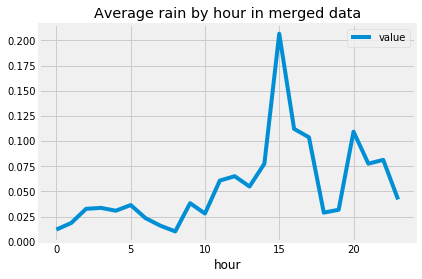

In [50]:
byhourRM = rainM.groupby(['year','month','day','hour'], as_index=False).agg({'value':'sum'}).reset_index(drop=True)
byHourRM = pd.pivot_table(byhourRM,values=['value'], index=['hour'],  aggfunc='mean')
byHourRM.plot(title='Average rain by hour in merged data');

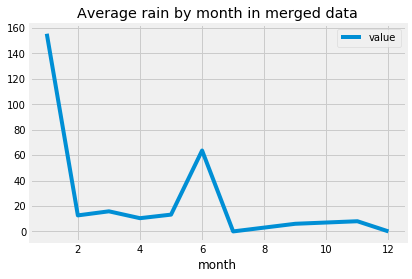

In [51]:

bymonthRM = rainM.groupby(['month'], as_index=False).agg({'value':'sum'}).reset_index(drop=True)
byMonthRM = pd.pivot_table(bymonthRM,values=['value'], index=['month'],  aggfunc='mean')
byMonthRM.plot(title='Average rain by month in merged data');

##  Why is the average so much higher in the middle of the day for the timestamps shared in common with the traffic data? Is it a mistake?

No. The data that overlaps is almost entirely 2016 data. And Sydney had such high rainfall in January 2016 in the middle of the day that it genuinely dragged the average up. 

We also should not remove the data. We noticed a drop off in traffic in January, which may be due to heavy rain.

In [52]:
#optional drop
#rainM.drop(rainM[rainM['value']>50].index, inplace=True)

byhourRM = rainM.groupby(['year','month','day','hour'], as_index=False).agg({'value':'sum'}).reset_index(drop=True)
byHourRM = pd.pivot_table(byhourRM,values=['value'], index=['hour'],  aggfunc='mean')

fig = plt.figure()

for frame in [byHourRM, byHourR]:
    plt.plot(frame['value'])

plt.title('Overlay of rain data before and after merge (average per hour) \n removing extreme outlier')
plt.show()

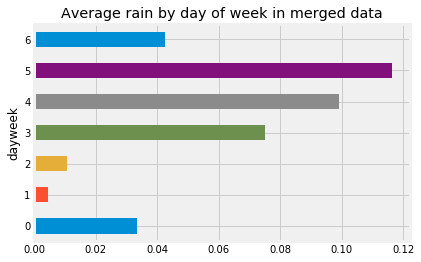

In [53]:
rainM.groupby('dayweek')['value'].mean().plot(kind='barh', title= 'Average rain by day of week in merged data');

## It rains more on Friday and Saturday? 
Maybe. Meterologists have observed greater rain on the weekend due to particulates accumulating during the working week creating 'seeds' for precipitation on the weekend. 
However we could cluster the rain into severity groups, rather than leaving it linear. This will help with outliers

In [54]:

rainseverity(rain)
rainseverity(rainM)

,area_code,value,qc_valid_start,qc_valid_end,date,year,month,day,hour,dayweek,timestamp,school,public,rainSev
0,NSW_PT005,0.0,NaN,NaN,2016-04-21 00:00:00,2016,4,21,0,3,2016042100,1,0,0
1,NSW_PT005,0.0,NaN,NaN,2016-04-21 01:00:00,2016,4,21,1,3,2016042101,1,0,0
2,NSW_PT005,0.0,NaN,NaN,2016-04-21 02:00:00,2016,4,21,2,3,2016042102,1,0,0
3,NSW_PT005,0.0,NaN,NaN,2016-04-21 03:00:00,2016,4,21,3,3,2016042103,1,0,0
4,NSW_PT005,0.0,NaN,NaN,2016-04-21 04:00:00,2016,4,21,4,3,2016042104,1,0,0
5,NSW_PT005,0.0,NaN,NaN,2016-04-21 05:00:00,2016,4,21,5,3,2016042105,1,0,0
6,NSW_PT005,0.0,NaN,NaN,2016-04-21 06:00:00,2016,4,21,6,3,2016042106,1,0,0
7,NSW_PT005,0.0,NaN,NaN,2016-04-21 07:00:00,2016,4,21,7,3,2016042107,1,0,0
8,NSW_PT005,0.0,NaN,NaN,2016-04-21 08:00:00,2016,4,21,8,3,2016042108,1,0,0
9,NSW_PT005,0.0,NaN,NaN,2016-04-21 09:00:00,2016,4,21,9,3,2016042109,1,0,0


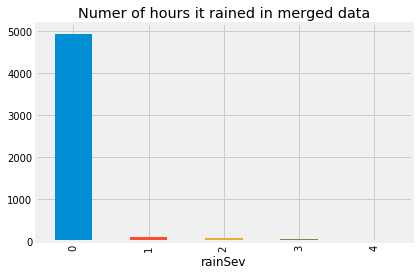

In [55]:
dat = rainM.groupby('rainSev')['value'].count()

dat.plot(kind='bar', title='Numer of hours it rained in merged data');

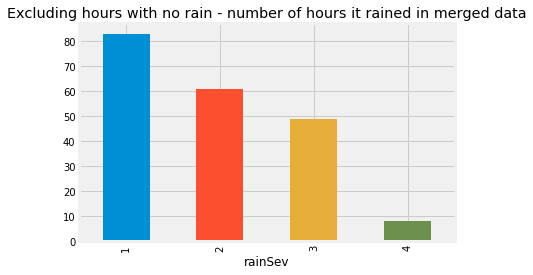

In [56]:
dat = rainM[rainM['rainSev']>0].groupby('rainSev')['value'].count()
dat.plot(kind='bar', title='Excluding hours with no rain - number of hours it rained in merged data');

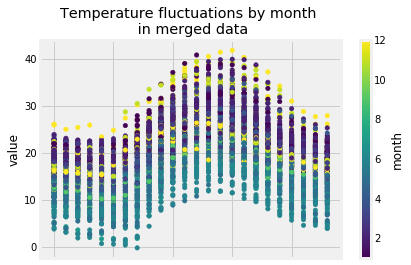

In [57]:
ax2 = weatherM.plot.scatter(x='hour',y='value',c='month',colormap='viridis', title='Temperature fluctuations by month \n in merged data')


Doing the same with temperature:

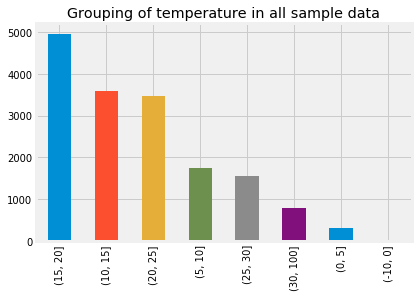

In [58]:
cuts = pd.cut(weather['value'], [-10,0,5, 10, 15,20,25,30,100])
cuts.value_counts().plot(kind='bar', title='Grouping of temperature in all sample data');



In [59]:
weatherseverity(weather)
weatherseverity(weatherM)

,area_code,value,qc_valid_start,qc_valid_end,date,year,month,day,hour,dayweek,timestamp,school,public,weathSev
0,NSW_PT005,18.3,NaN,NaN,2016-04-21 00:00:00,2016,4,21,0,3,2016042100,1,0,2
1,NSW_PT005,17.7,NaN,NaN,2016-04-21 01:00:00,2016,4,21,1,3,2016042101,1,0,2
2,NSW_PT005,16.3,NaN,NaN,2016-04-21 02:00:00,2016,4,21,2,3,2016042102,1,0,2
3,NSW_PT005,15.1,NaN,NaN,2016-04-21 03:00:00,2016,4,21,3,3,2016042103,1,0,2
4,NSW_PT005,14.9,NaN,NaN,2016-04-21 04:00:00,2016,4,21,4,3,2016042104,1,0,1
5,NSW_PT005,15.0,NaN,NaN,2016-04-21 05:00:00,2016,4,21,5,3,2016042105,1,0,1
6,NSW_PT005,15.3,NaN,NaN,2016-04-21 06:00:00,2016,4,21,6,3,2016042106,1,0,2
7,NSW_PT005,16.8,NaN,NaN,2016-04-21 07:00:00,2016,4,21,7,3,2016042107,1,0,2
8,NSW_PT005,17.5,NaN,NaN,2016-04-21 08:00:00,2016,4,21,8,3,2016042108,1,0,2
9,NSW_PT005,19.9,NaN,NaN,2016-04-21 09:00:00,2016,4,21,9,3,2016042109,1,0,2


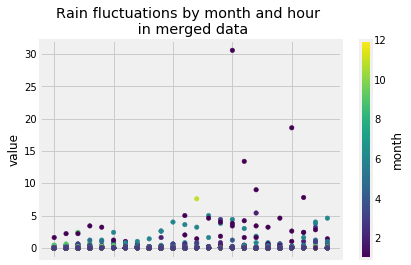

In [60]:
ax2 = rainM.plot.scatter(x='hour',y='value',c='month',colormap='viridis', title='Rain fluctuations by month and hour \n in merged data')

In [61]:
temp = rainM[['timestamp', 'value', 'rainSev']]

allW = pd.merge(weatherM, temp, left_on = 'timestamp', right_on = 'timestamp', how = 'inner')
allW.rename(columns={'value_x':'valueT', 'value_y':'valueR'}, inplace=True)
#info(allW)

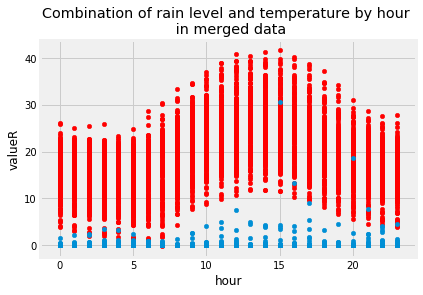

In [62]:
ax = allW.plot.scatter(x='hour',y='valueT', color='red', title='Combination of rain level and temperature by hour \n in merged data')
ax2 = allW.plot.scatter(x='hour', y='valueR', ax=ax)

In [63]:
temp = allW[['timestamp','valueT', 'valueR', 'rainSev', 'weathSev']]
allDataS = pd.merge(trafficSg, temp, left_on = 'timestamp', right_on = 'timestamp', how = 'inner')

allDataN =pd.merge(trafficNg, temp, left_on = 'timestamp', right_on = 'timestamp', how = 'inner')

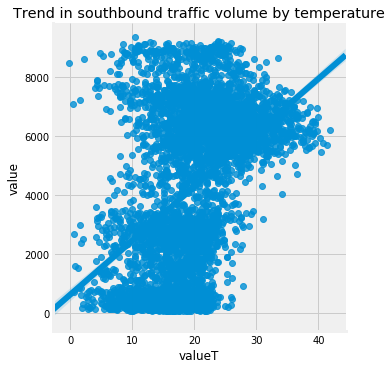

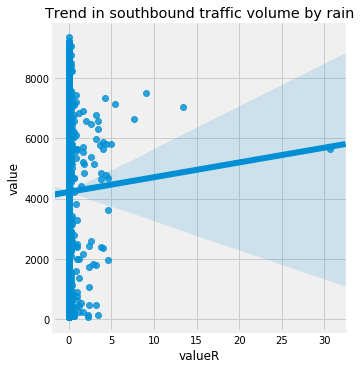

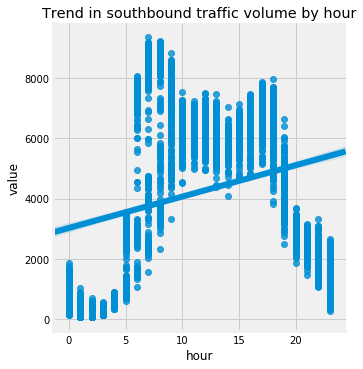

In [64]:
sns.lmplot(x='valueT', y='value', data=allDataS)
plt.title('Trend in southbound traffic volume by temperature')
plt.show()
sns.lmplot(x='valueR', y='value', data=allDataS)
plt.title('Trend in southbound traffic volume by rain')
plt.show()
sns.lmplot(x='hour', y='value', data=allDataS)
plt.title('Trend in southbound traffic volume by hour')
plt.show()

In [65]:
#info(allDataN)

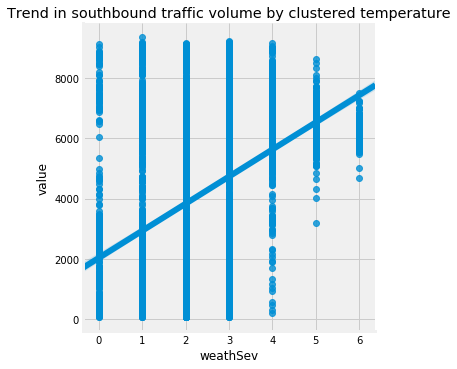

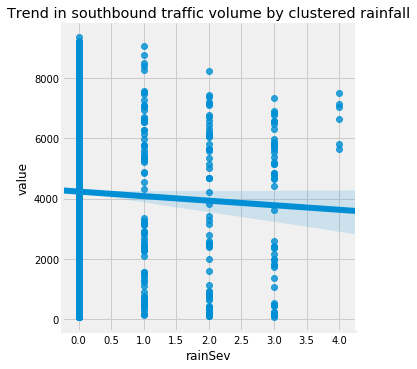

In [66]:
sns.lmplot(x='weathSev', y='value', data=allDataS)
plt.title('Trend in southbound traffic volume by clustered temperature')
plt.show()
sns.lmplot(x='rainSev', y='value', data=allDataS)
plt.title('Trend in southbound traffic volume by clustered rainfall')
plt.show()


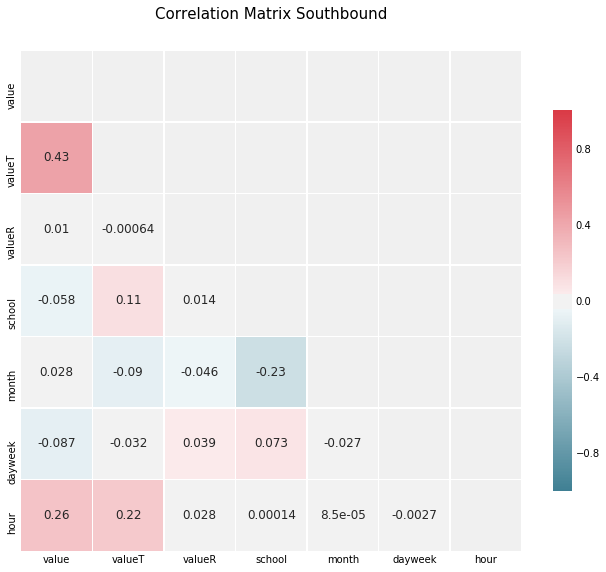

In [67]:
features = ['value','valueT','valueR', 'school','month', 'dayweek', 'hour']
corr_plot(allDataS[features], title_name='Correlation Matrix Southbound')

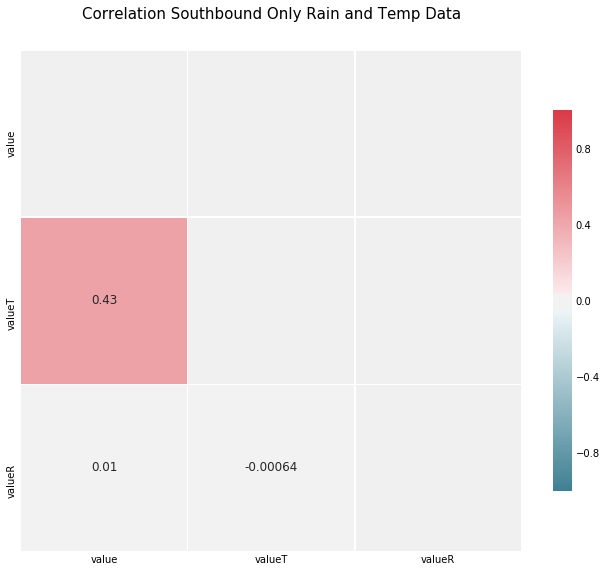

In [68]:
features = ['value','valueT','valueR']
corr_plot(allDataS[features], title_name='Correlation Southbound Only Rain and Temp Data')

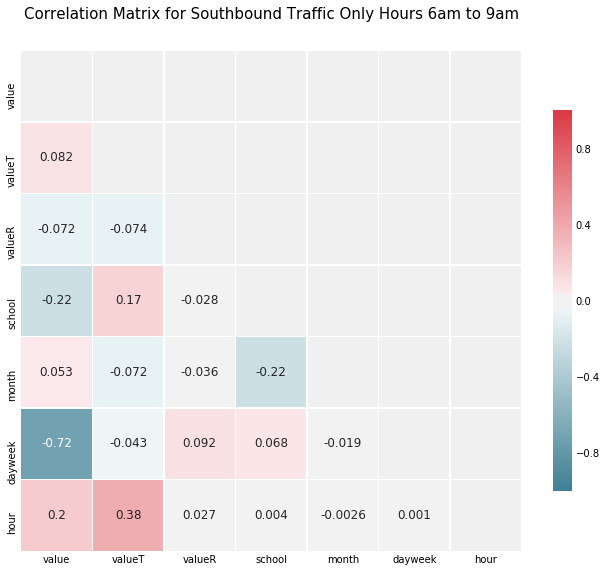

In [69]:
a = allDataS[allDataS['hour'].isin([6,7,8,9])]
features = ['value','valueT','valueR', 'school','month', 'dayweek', 'hour']
corr_plot(a[features],'Correlation Matrix for Southbound Traffic Only Hours 6am to 9am')

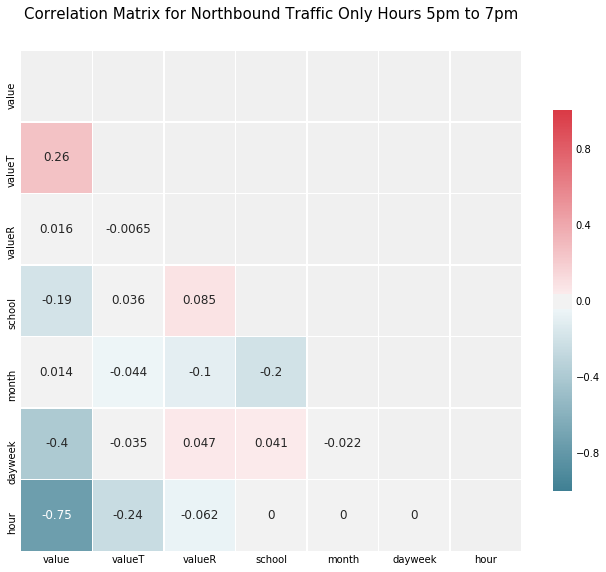

In [70]:
a = allDataN[allDataN['hour'].isin([17,18,19])]
corr_plot(a[features],'Correlation Matrix for Northbound Traffic Only Hours 5pm to 7pm')

# Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

def linregsimp(dataframe, features, title):
    X = dataframe[features]
    y = dataframe['value']
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=5)
    
    lrsimp = LinearRegression()
    lrsimp.fit(Xtrain, ytrain)
    
    ypred = lrsimp.predict(Xtest)
    
    print('Intercept', lrsimp.intercept_)
    print('Mean Squared Error', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
    
    plt.scatter(ytest,ypred)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(title)
    
    coeffecients = pd.DataFrame(lrsimp.coef_,X.columns)
    coeffecients.columns = ['Coeffecient']
    print(coeffecients)
    
    return (ytest,ypred)
    
def distplot(ytest,ypred):
    sns.distplot((ytest-ypred),bins=100);
  
    



Intercept 380.01846742585076
Mean Squared Error 2417.767912062163
         Coeffecient
valueT    172.137824
valueR     64.263334
school   -611.047690
month      32.597033
dayweek   -93.804510
hour       64.901795


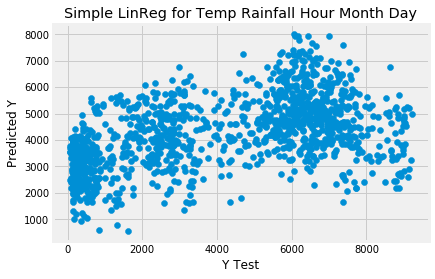

In [72]:
features = ['valueT','valueR', 'school','month', 'dayweek', 'hour']
x = linregsimp(allDataS, features, 'Simple LinReg for Temp Rainfall Hour Month Day')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


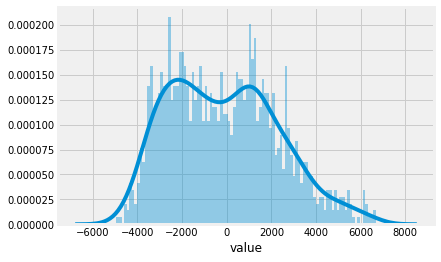

In [73]:
distplot(x[0],x[1])

Intercept 494.32473794399993
Mean Squared Error 2740.5482713149945
         Coeffecient
valueT    167.977330
valueR   -104.577790
school   -644.726857
month      10.875003
dayweek   110.878516
hour       44.987487


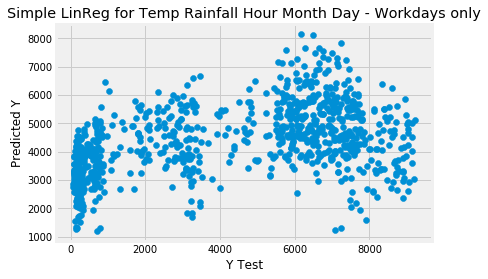

In [74]:
features = ['valueT','valueR', 'school','month', 'dayweek', 'hour']
workdays = allDataS[allDataS['workday']==1];
x = linregsimp(workdays, features, 'Simple LinReg for Temp Rainfall Hour Month Day - Workdays only')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


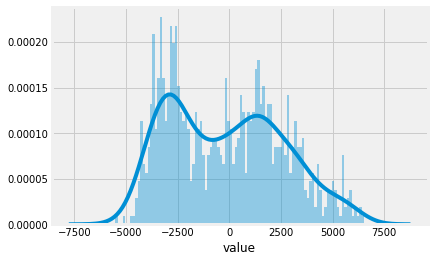

In [75]:
distplot(x[0],x[1])

A straight line linear regression needs a normal distribution. This distribution is not normal...

## The model thinks dayweek, month, and hour are ordinal. Better make them categories! 

In [76]:
newcol = pd.get_dummies(allDataS['hour'], prefix='hour_').iloc[:,1:]
allDataSCat = pd.concat([allDataS,newcol], axis=1)

newcol = pd.get_dummies(allDataS['dayweek'],prefix='dayweek_').iloc[:,1:]
allDataSCat = pd.concat([allDataSCat,newcol], axis=1)

newcol = pd.get_dummies(allDataS['month'],prefix='month').iloc[:,1:]
allDataSCat = pd.concat([allDataSCat,newcol], axis=1)

In [77]:
allDataSCat.columns

Index(['year', 'date', 'direction', 'public', 'school', 'hour', 'month', 'day', 'dayweek', 'timestamp', 'value', 'workday', 'dateonly', 'valueT', 'valueR', 'rainSev', 'weathSev', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23', 'dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12'], dtype='object')

Intercept 392.4106454739954
Mean Squared Error 908.9939326368853
            Coeffecient
valueT         2.689329
valueR       -21.462370
school      -209.419544
hour__1     -321.492200
hour__2     -373.755585
hour__3     -342.251850
hour__4      -26.421261
hour__5     1873.626274
hour__6     5214.134076
hour__7     6444.273601
hour__8     6741.113632
hour__9     6341.050285
hour__10    5676.134654
hour__11    5489.303009
hour__12    5553.524148
hour__13    5211.796993
hour__14    5202.108583
hour__15    5614.149683
hour__16    5961.243349
hour__17    6388.924984
hour__18    5913.187678
hour__19    3752.644176
hour__20    2252.468757
hour__21    1826.305736
hour__22    1359.590452
hour__23     437.238102
dayweek__1   154.906494
dayweek__2   310.006608
dayweek__3   360.563768
dayweek__4   374.035709
dayweek__5  -229.560131
dayweek__6  -795.700386
month_2      305.844948
month_3      251.354931
month_4      348.401401
month_5      210.653809
month_6      127.658495
month_7      119.396234

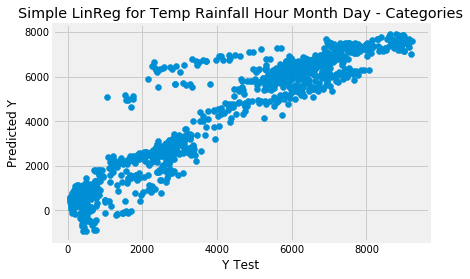

In [78]:
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']
x = linregsimp(allDataSCat, features, 'Simple LinReg for Temp Rainfall Hour Month Day - Categories')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


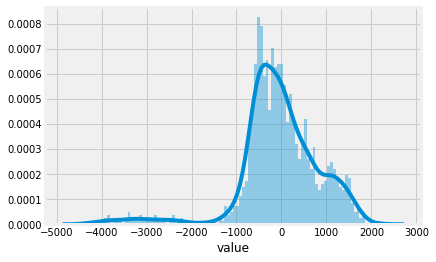

In [79]:
distplot(x[0],x[1])

Intercept 8080.9247590495725
Mean Squared Error 745.0946082594362
        Coeffecient
valueT    -1.621070
valueR -1650.501692


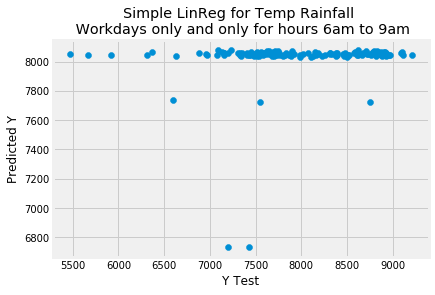

In [80]:
workdayDataSCat = allDataSCat[(allDataSCat['workday']==1)& (allDataSCat['hour'].isin([6,7,8,9]))]
features = ['valueT','valueR']
x = linregsimp(workdayDataSCat, features,'Simple LinReg for Temp Rainfall \n Workdays only and only for hours 6am to 9am')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


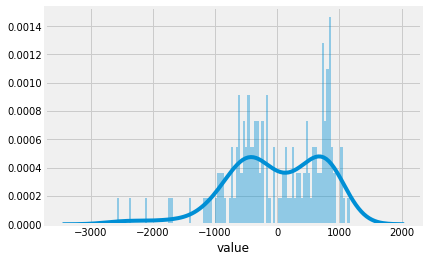

In [81]:
distplot(x[0],x[1])

Intercept 7025.003625598823
Mean Squared Error 471.68906924031353
             Coeffecient
valueT      2.034090e+01
valueR     -1.987824e+02
school     -6.006128e+02
hour__1    -1.705303e-12
hour__2    -1.818989e-12
hour__3    -4.547474e-13
hour__4    -1.705303e-13
hour__5     4.547474e-13
hour__6    -6.908652e+02
hour__7     5.079391e+02
hour__8     5.605699e+02
hour__9    -3.776438e+02
hour__10    1.705303e-13
hour__11   -2.273737e-13
hour__12    1.705303e-13
hour__13   -1.421085e-13
hour__14    1.989520e-13
hour__15    3.410605e-13
hour__16    5.684342e-14
hour__17    0.000000e+00
hour__18    0.000000e+00
hour__19    0.000000e+00
hour__20    0.000000e+00
hour__21    0.000000e+00
hour__22    0.000000e+00
hour__23    0.000000e+00
dayweek__1  1.503684e+02
dayweek__2  2.554911e+02
dayweek__3  1.400929e+02
dayweek__4  3.395029e+01
dayweek__5  0.000000e+00
dayweek__6  0.000000e+00
month_2     6.769793e+02
month_3     6.248942e+02
month_4     1.004317e+03
month_5     9.164532e+02
month_6  

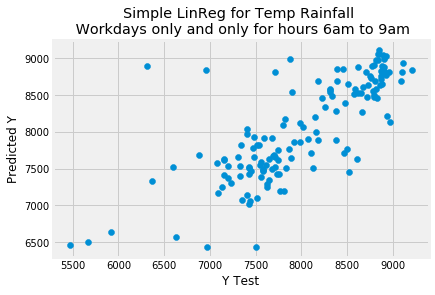

In [82]:
workdayDataSCat = allDataSCat[(allDataSCat['workday']==1)& (allDataSCat['hour'].isin([6,7,8,9]))]
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']

x = linregsimp(workdayDataSCat, features,'Simple LinReg for Temp Rainfall \n Workdays only and only for hours 6am to 9am')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


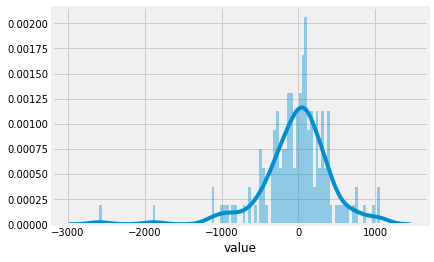

In [83]:
distplot(x[0],x[1])

Intercept 5117.226418897766
Mean Squared Error 495.835159513866
             Coeffecient
valueT      1.745955e+01
valueR      4.293067e+01
school     -2.621761e+02
hour__1     0.000000e+00
hour__2     1.136868e-13
hour__3    -1.136868e-13
hour__4    -3.410605e-13
hour__5    -3.410605e-13
hour__6    -2.273737e-13
hour__7     5.684342e-13
hour__8     2.273737e-13
hour__9    -1.136868e-13
hour__10   -1.136868e-13
hour__11    9.947598e-14
hour__12    2.557954e-13
hour__13   -8.526513e-14
hour__14   -3.410605e-13
hour__15    1.705303e-13
hour__16    0.000000e+00
hour__17    1.111326e+03
hour__18    5.659551e+02
hour__19   -1.677281e+03
hour__20    0.000000e+00
hour__21    0.000000e+00
hour__22    0.000000e+00
hour__23    0.000000e+00
dayweek__1  3.995484e+02
dayweek__2  5.932992e+02
dayweek__3  5.075916e+02
dayweek__4  6.424758e+02
dayweek__5  0.000000e+00
dayweek__6  0.000000e+00
month_2     3.898342e+02
month_3     3.949938e+02
month_4     5.314978e+02
month_5     3.757213e+02
month_6    

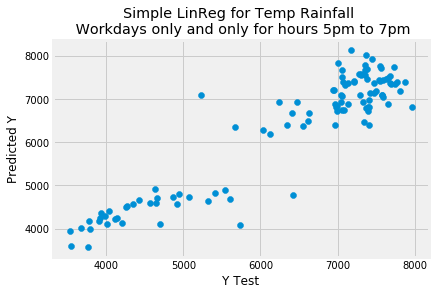

In [84]:
workdayDataSCat = allDataSCat[(allDataSCat['workday']==1)& (allDataSCat['hour'].isin([17,18,19]))]
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']

x = linregsimp(workdayDataSCat, features,'Simple LinReg for Temp Rainfall \n Workdays only and only for hours 5pm to 7pm')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


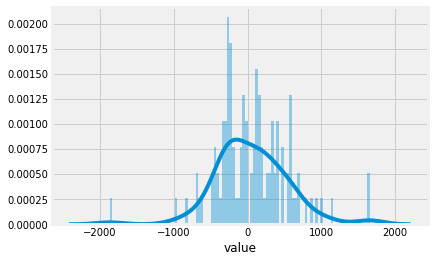

In [85]:
distplot(x[0],x[1])

Intercept 4359.8280717968155
Mean Squared Error 389.94155493415053
             Coeffecient
valueT      3.832682e+01
valueR     -6.821210e-12
school     -1.250725e+02
hour__1     1.250555e-12
hour__2     6.821210e-13
hour__3    -1.932676e-12
hour__4     6.821210e-13
hour__5    -6.821210e-13
hour__6     0.000000e+00
hour__7     0.000000e+00
hour__8     0.000000e+00
hour__9     0.000000e+00
hour__10    0.000000e+00
hour__11    0.000000e+00
hour__12    0.000000e+00
hour__13    0.000000e+00
hour__14    0.000000e+00
hour__15    0.000000e+00
hour__16    0.000000e+00
hour__17    1.556114e+03
hour__18    3.262282e+02
hour__19   -1.882342e+03
hour__20    0.000000e+00
hour__21    0.000000e+00
hour__22    0.000000e+00
hour__23    0.000000e+00
dayweek__1  0.000000e+00
dayweek__2  0.000000e+00
dayweek__3  0.000000e+00
dayweek__4  0.000000e+00
dayweek__5  0.000000e+00
dayweek__6  0.000000e+00
month_2     6.425682e+02
month_3     6.859901e+02
month_4     6.327035e+02
month_5     6.695099e+02
month_6 

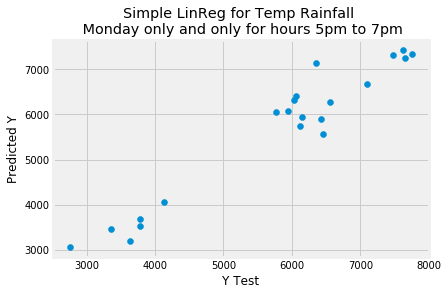

In [86]:
workdayDataSCat = allDataSCat[(allDataSCat['dayweek']==0)& (allDataSCat['hour'].isin([17,18,19]))]
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']

x = linregsimp(workdayDataSCat, features,'Simple LinReg for Temp Rainfall \n Monday only and only for hours 5pm to 7pm')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


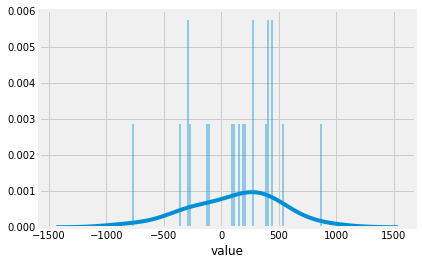

In [87]:
distplot(x[0],x[1])

Intercept 5341.406889169803
Mean Squared Error 494.8457524731643
             Coeffecient
weathSev    6.658711e+01
rainSev     3.321314e+01
school     -2.796002e+02
hour__1     1.136868e-13
hour__2    -5.115908e-13
hour__3    -3.979039e-13
hour__4     1.421085e-13
hour__5     2.273737e-13
hour__6     6.821210e-13
hour__7    -4.547474e-13
hour__8    -1.705303e-13
hour__9     1.136868e-13
hour__10    1.207923e-13
hour__11   -1.136868e-13
hour__12    8.526513e-14
hour__13   -3.410605e-13
hour__14    1.136868e-13
hour__15    0.000000e+00
hour__16    0.000000e+00
hour__17    1.117756e+03
hour__18    5.640467e+02
hour__19   -1.681803e+03
hour__20    0.000000e+00
hour__21    0.000000e+00
hour__22    0.000000e+00
hour__23    0.000000e+00
dayweek__1  3.984228e+02
dayweek__2  5.947640e+02
dayweek__3  5.141630e+02
dayweek__4  6.409274e+02
dayweek__5  0.000000e+00
dayweek__6  0.000000e+00
month_2     3.744345e+02
month_3     3.771427e+02
month_4     5.035655e+02
month_5     3.204922e+02
month_6   

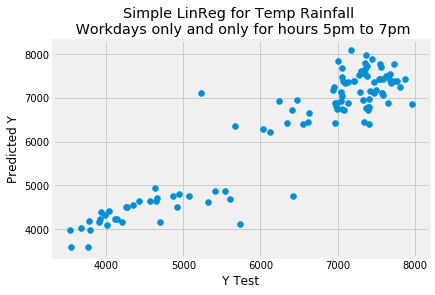

In [88]:
workdayDataSCat = allDataSCat[(allDataSCat['workday']==1)& (allDataSCat['hour'].isin([17,18,19]))]
features = ['weathSev','rainSev', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']

x = linregsimp(workdayDataSCat, features,'Simple LinReg for Temp Rainfall \n Workdays only and only for hours 5pm to 7pm')

## Polyfit

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def linregpoly(dataframe, features, title):
    X = dataframe[features]
    y = dataframe['value']
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=5);
    
    
    poly = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=True, normalize=True))]);
    poly.fit(Xtrain, ytrain);
    
    

    ypred = poly.predict(Xtest);
    
    plt.scatter(ytest,ypred)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(title)
    
    print(ypred)
    
    print('Mean Squared Error', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

    return (ytest,ypred)
    




[7101.76269531 8079.51269531 2908.66699219 ... 6446.76269531 7217.26269531 6478.26269531]
Mean Squared Error 354.18654355692763


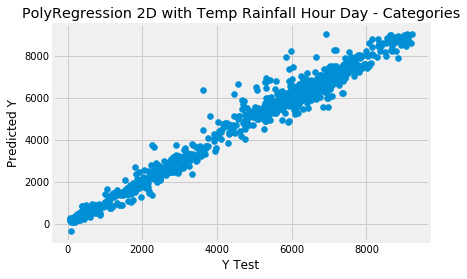

In [90]:
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6']

x = linregpoly(allDataSCat, features, 'PolyRegression 2D with Temp Rainfall Hour Day - Categories')


/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


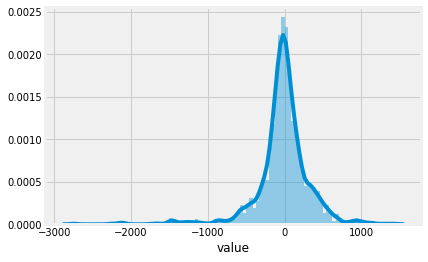

In [91]:
distplot(x[0],x[1])

[ 7232.  8736.  7648.  8000.  8224.  7520.  6848.  7616.  8832.  7040.  8640.  8640.  7488.  7136.  8320.
  8800.  7456.  8736.  8576.  7648.  7776.  7520.  7424.  8704.  7744.  6944.  7936.  8000.  7904.  8576.
  8704.  7456.  5536.  8128.  8832. 13152.  8640.  8000.  8576.  8736.  7424.  8672.  8640.  8672.  7616.
  7680.  4768.  8480.  7552.  6496.  8032.  8832.  8800.  6528.  6848.  7552.  8512.  7200.  7296.  7808.
  8736.  8320.  7648.  8704.  8800.  7520.  7264.  7520.  6784.  7008.  8448.  7392.  7360.  8032.  7392.
  7360.  8864.  8672.  7744.  8768.  8768.  7552.  7392.  7552.  8832.  7968.  8768.  7520.  7776.  7072.
  8576.  7584.  8800.  7584.  8576.  8448.  7456.  7968.  8832.  7648.  8672.  7360.  7360.  7456.  8576.
  8768.  8768.  7936.  7488.  8672.  8640.  7328.  8864.  7488.  8768.  8800.  8800.  7712.  7648.  8832.
  7136.  7808.  6752.  8512.  7616.  7936.  7776.  7680.  8064.  8768.  8672.  7392.  7776.  7616.  7552.
  8864.  7488.  8832.  8768.  8800.  8832.  92

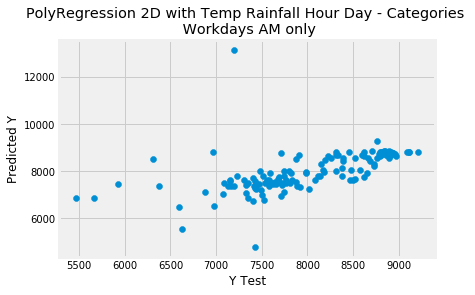

In [92]:
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6']

x = linregpoly(allDataSCat[(allDataSCat['workday']==1)&(allDataSCat['hour'].isin([6,7,8,9]))], features, 'PolyRegression 2D with Temp Rainfall Hour Day - Categories \n Workdays AM only')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


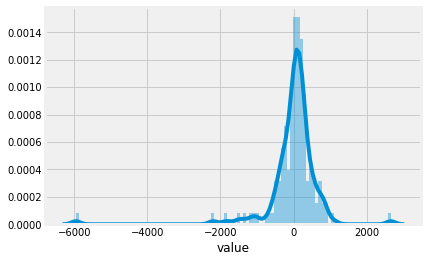

In [93]:
distplot(x[0],x[1])

[ 5.64544434e+03  8.79269434e+03  1.54944336e+02  8.88544434e+03  7.12144434e+03  1.97823242e+02
  5.90444434e+03  2.70881836e+02  7.37044434e+03  8.17244434e+03  2.74944336e+02  6.67844434e+03
  6.68794434e+03  1.32006836e+02  8.56094434e+03  6.17988184e+03  7.33143359e+03  5.33444434e+03
  6.89944336e+02  7.09194434e+03  7.99444336e+02  3.18944336e+02  6.18099512e+03  2.89969434e+03
  8.88294434e+03  6.51894434e+03  6.11363574e+03  7.72614355e+03  6.24344434e+03  6.19394434e+03
  6.29944434e+03  6.13444434e+03  7.17644434e+03  7.39243359e+03  1.86194336e+02  3.40131836e+02
  6.26944434e+03  2.04194336e+02  6.49044434e+03  3.41233398e+02  5.72006152e+03  1.41943359e+01
  7.48844434e+03  2.58760742e+02  6.34544434e+03  8.93219434e+03  2.01169434e+03  5.76600684e+03
  7.54544434e+03  2.50319336e+02  5.11919434e+03  5.10474609e+03  2.14506836e+02  1.73944336e+02
  4.49544434e+03  3.37438184e+03  2.07769434e+03  7.18894434e+03  3.17844434e+03  2.05444336e+02
  1.21094434e+03  7.26506934e+

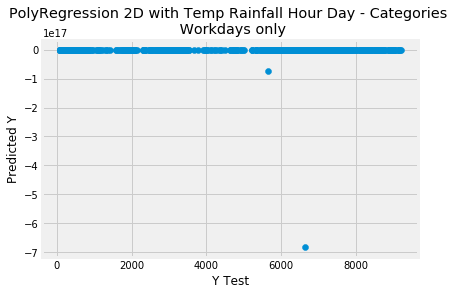

In [94]:
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6']

x = linregpoly(allDataSCat[allDataSCat['workday']==1], features, 'PolyRegression 2D with Temp Rainfall Hour Day - Categories \n Workdays only')


/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


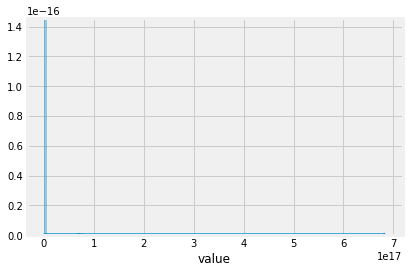

In [95]:
distplot(x[0],x[1])

# Scaled or Normalised

In [161]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, quantile_transform

def linregsimpNorm(dataframe, features, title):
    X = dataframe[features]
    y = dataframe['value']
    
    
    scale = Normalizer().fit_transform(X)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=5)
    

    linreg = LinearRegression()
    linreg.fit(Xtrain, ytrain)
    
    ypred = linreg.predict(Xtest);

    
   
    print('Intercept', linreg.intercept_)
    print('Mean Squared Error', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
    
    plt.scatter(ytest,ypred)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(title)
    
    coeffecients = pd.DataFrame(linreg.coef_,X.columns)
    coeffecients.columns = ['Coeffecient']
    print(coeffecients)
    
    return (ytest,ypred)
    
def distplot(ytest,ypred):
    sns.distplot((ytest-ypred),bins=100);
  
    



Intercept 392.4106454739954
Mean Squared Error 908.9939326368853
            Coeffecient
valueT         2.689329
valueR       -21.462370
school      -209.419544
hour__1     -321.492200
hour__2     -373.755585
hour__3     -342.251850
hour__4      -26.421261
hour__5     1873.626274
hour__6     5214.134076
hour__7     6444.273601
hour__8     6741.113632
hour__9     6341.050285
hour__10    5676.134654
hour__11    5489.303009
hour__12    5553.524148
hour__13    5211.796993
hour__14    5202.108583
hour__15    5614.149683
hour__16    5961.243349
hour__17    6388.924984
hour__18    5913.187678
hour__19    3752.644176
hour__20    2252.468757
hour__21    1826.305736
hour__22    1359.590452
hour__23     437.238102
dayweek__1   154.906494
dayweek__2   310.006608
dayweek__3   360.563768
dayweek__4   374.035709
dayweek__5  -229.560131
dayweek__6  -795.700386
month_2      305.844948
month_3      251.354931
month_4      348.401401
month_5      210.653809
month_6      127.658495
month_7      119.396234

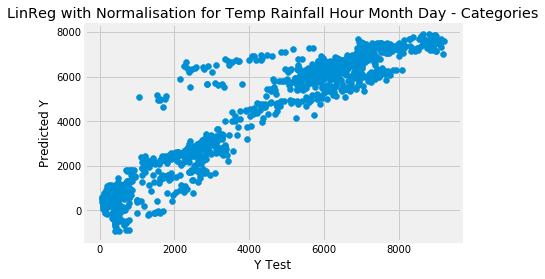

In [162]:
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']
x = linregsimpNorm(allDataSCat, features, 'LinReg with Normalisation for Temp Rainfall Hour Month Day - Categories')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


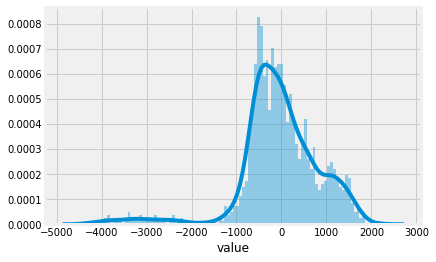

In [165]:
distplot(x[0],x[1])

Normalise does not seem to help - it is extremely similar to the non-normalised results for Ypred

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, quantile_transform

def linregsimpScale(dataframe, features, title):
    X = dataframe[features]
    y = dataframe['value']
    
    
    scale = StandardScaler().fit_transform(X)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=5)
    

    linreg = LinearRegression()
    linreg.fit(Xtrain, ytrain)
    
    ypred = linreg.predict(Xtest);


   
    print('Intercept', linreg.intercept_)
    print('Mean Squared Error', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
    
    plt.scatter(ytest,ypred)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(title)
    
    coeffecients = pd.DataFrame(linreg.coef_,X.columns)
    coeffecients.columns = ['Coeffecient']
    print(coeffecients)
    
    return (ytest,ypred)
    
def distplot(ytest,ypred):
    sns.distplot((ytest-ypred),bins=100);
  
    



/home/oliviaross/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/oliviaross/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Intercept 392.4106454739954
Mean Squared Error 908.9939326368853
            Coeffecient
valueT         2.689329
valueR       -21.462370
school      -209.419544
hour__1     -321.492200
hour__2     -373.755585
hour__3     -342.251850
hour__4      -26.421261
hour__5     1873.626274
hour__6     5214.134076
hour__7     6444.273601
hour__8     6741.113632
hour__9     6341.050285
hour__10    5676.134654
hour__11    5489.303009
hour__12    5553.524148
hour__13    5211.796993
hour__14    5202.108583
hour__15    5614.149683
hour__16    5961.243349
hour__17    6388.924984
hour__18    5913.187678
hour__19    3752.644176
hour__20    2252.468757
hour__21    1826.305736
hour__22    1359.590452
hour__23     437.238102
dayweek__1   154.906494
dayweek__2   310.006608
dayweek__3   360.563768
dayweek__4   374.035709
dayweek__5  -229.560131
dayweek__6  -795.700386
month_2      305.844948
month_3      251.354931
month_4      348.401401
month_5      210.653809
month_6      127.658495
month_7      119.396234

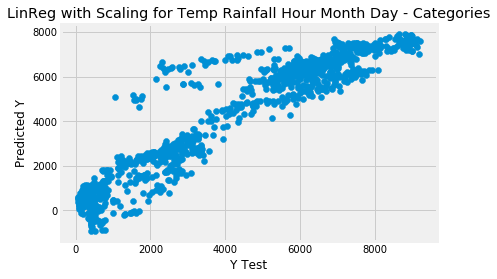

In [164]:
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']
x = linregsimpScale(allDataSCat, features, 'LinReg with Scaling for Temp Rainfall Hour Month Day - Categories')

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


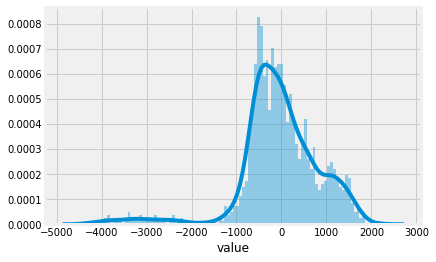

In [166]:
distplot(x[0],x[1])

This also seems to have no impact.


In [167]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, quantile_transform

def linregsimpMinMax(dataframe, features, title):
    X = dataframe[features]
    y = dataframe['value']
    
    scale = MinMaxScaler().fit_transform(X)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(scale, y, random_state=5)
    
    

    linreg= LinearRegression()
    linreg.fit(Xtrain, ytrain)
    
    ypred = linreg.predict(Xtest);

    
    
    #linreg = regr_trans.regressor_
    
   
    print('Intercept', linreg.intercept_)
    print('Mean Squared Error', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
    
    plt.scatter(ytest,ypred)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(title)
    
    coeffecients = pd.DataFrame(linreg.coef_,X.columns)
    coeffecients.columns = ['Coeffecient']
    print(coeffecients)
    
    return (ytest,ypred)
    
def distplot(ytest,ypred):
    sns.distplot((ytest-ypred),bins=100);
  
    


Intercept 391.8727795854452
Mean Squared Error 908.9939326368847
            Coeffecient
valueT       112.951837
valueR      -656.748518
school      -209.419544
hour__1     -321.492200
hour__2     -373.755585
hour__3     -342.251850
hour__4      -26.421261
hour__5     1873.626274
hour__6     5214.134076
hour__7     6444.273601
hour__8     6741.113632
hour__9     6341.050285
hour__10    5676.134654
hour__11    5489.303009
hour__12    5553.524148
hour__13    5211.796993
hour__14    5202.108583
hour__15    5614.149683
hour__16    5961.243349
hour__17    6388.924984
hour__18    5913.187678
hour__19    3752.644176
hour__20    2252.468757
hour__21    1826.305736
hour__22    1359.590452
hour__23     437.238102
dayweek__1   154.906494
dayweek__2   310.006608
dayweek__3   360.563768
dayweek__4   374.035709
dayweek__5  -229.560131
dayweek__6  -795.700386
month_2      305.844948
month_3      251.354931
month_4      348.401401
month_5      210.653809
month_6      127.658495
month_7      119.396234

/home/oliviaross/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


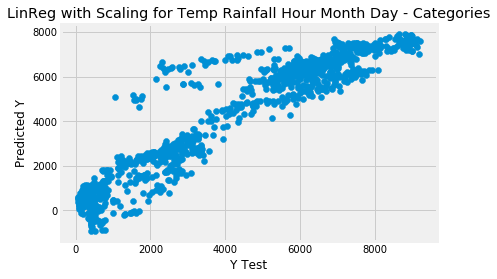

In [168]:
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']
x = linregsimpMinMax(allDataSCat, features, 'LinReg with Scaling for Temp Rainfall Hour Month Day - Categories')

This now seems closer to being better adjusted. Hour still has a significant impact, but with MinMax scaling we can see that rain is associated with a significant drop in traffic over the harbour, and temperature with a moderate increase. 

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


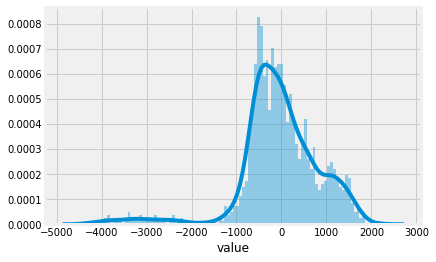

In [169]:
distplot(x[0],x[1])

In [157]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, quantile_transform

def linregsimpRobust(dataframe, features, title):
    X = dataframe[features]
    y = dataframe['value']
    
    scale = RobustScaler().fit_transform(X)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(scale, y, random_state=5)
    
    

    linreg= LinearRegression()
    linreg.fit(Xtrain, ytrain)
    
    ypred = linreg.predict(Xtest);

    
    
    #linreg = regr_trans.regressor_
    
   
    print('Intercept', linreg.intercept_)
    print('Mean Squared Error', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
    
    plt.scatter(ytest,ypred)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(title)
    
    coeffecients = pd.DataFrame(linreg.coef_,X.columns)
    coeffecients.columns = ['Coeffecient']
    print(coeffecients)
    
    return (ytest,ypred)
    
def distplot(ytest,ypred):
    sns.distplot((ytest-ypred),bins=100);
  
    


Intercept 444.583636659504
Mean Squared Error 908.993932636885
            Coeffecient
valueT        21.918035
valueR       -21.462370
school      -209.419544
hour__1     -321.492200
hour__2     -373.755585
hour__3     -342.251850
hour__4      -26.421261
hour__5     1873.626274
hour__6     5214.134076
hour__7     6444.273601
hour__8     6741.113632
hour__9     6341.050285
hour__10    5676.134654
hour__11    5489.303009
hour__12    5553.524148
hour__13    5211.796993
hour__14    5202.108583
hour__15    5614.149683
hour__16    5961.243349
hour__17    6388.924984
hour__18    5913.187678
hour__19    3752.644176
hour__20    2252.468757
hour__21    1826.305736
hour__22    1359.590452
hour__23     437.238102
dayweek__1   154.906494
dayweek__2   310.006608
dayweek__3   360.563768
dayweek__4   374.035709
dayweek__5  -229.560131
dayweek__6  -795.700386
month_2      305.844948
month_3      251.354931
month_4      348.401401
month_5      210.653809
month_6      127.658495
month_7      119.396234
m

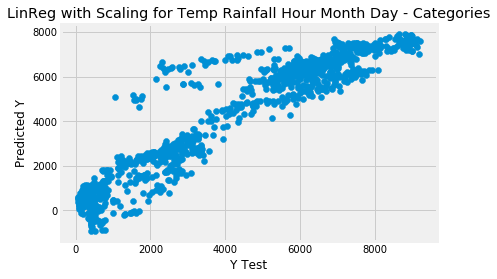

In [160]:
features = ['valueT','valueR', 'school', 'hour__1', 'hour__2', 'hour__3', 'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9', 'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15', 'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21', 'hour__22', 'hour__23','dayweek__1', 'dayweek__2', 'dayweek__3', 'dayweek__4', 'dayweek__5', 'dayweek__6','month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_11', 'month_12']
x = linregsimpRobust(allDataSCat, features, 'LinReg with Scaling for Temp Rainfall Hour Month Day - Categories')

Robust scaling dropped the impact of the temperature and rain on Y back to dozens of cars, rather than 100s. 

/home/oliviaross/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


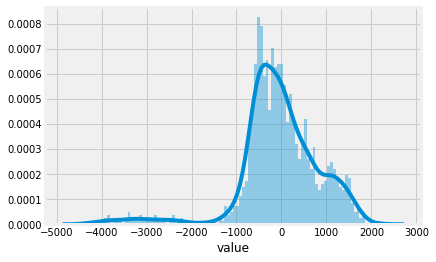

In [170]:
distplot(x[0],x[1])